Hola **Rocio**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario general (2da Iteracion)</b> <a class=“tocSkip”></a>

**¡Te felicito por el trabajo realizado Rocio!** Con este proyecto demuestras las habilidades adquiridas durante tu formación, se nota tu capacidad de contar historias con datos con la excelente presentación realizada que súper fácil de entender lo cual es una habilidad super importante cómo analista de datos, el saber comunicar de manera sencilla y eficiente los resultados de tus análisis.
    
Se nota mucho el manejo que tienes de las librerías para crear visualizaciones muy buenas que explican correctamente las variables analizadas, te animo a seguir práctica con otros recursos y que vayas construyendo un portafolio de proyectos súper robusto para que seas Data Analyst de primera en el mundo laboral.
   
Saludos!
</div>

# Proyecto Sprint 14

## Descomposicion 

### Contexto

El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

### Objetivo

Mejorar el servicio de telefonia virtual CallMeMaybe a traves de la identificacion de operadores menos eficaces 



### Quien recibira el analisis de los datos

Supervisores de CallMeMaybe

### Que decisiones se realizaran con el analisis de datos ???

### Especificar detalles

#### Cuantas llamadas minimias de entrada se necesitan para que el operador sea eficaz ?
#### Cuantas llamadas minimias de salida se necesitan para que el operador sea eficaz ?
#### Cuantas llamadas perdidas son aceptables
#### Que se busca lograr en la llamada
#### Cuales son mas importantes las llamadas de entrada o de salida

### Tareas

#### Definir cuantas llamadas realiza cada operador, realizar histograma
#### Cuanto se demorada en cada llamada (con y sin tiempo de espera), realizar grafico 
#### Cuantas llamadas perdidas posee cada operador
#### Cuantas llamadas internas realizan, comparar con las llamadas externas
#### Cuantas llamadas realiza cada cliente, histograma
#### Planteamiento de hipotesis: si los operadores con muchas llamadas perdidas son menos eficaces que los operadores con pocas llamadas 


## Procesamiento de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import f_oneway

In [2]:
clients = pd.read_csv('/datasets/telecom_clients_us.csv')
dataset = pd.read_csv('/datasets/telecom_dataset_us.csv')

In [3]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [5]:
dataset.head(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [6]:
clients.head(5)

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


### Analisis de datos duplicados 

In [7]:
def duplicates(df):
    "Revisa filas duplicadas en los dataframe"
    dup = df.duplicated().sum()
    return print(dup)

duplicates(dataset)
duplicates(clients)

4900
0


In [8]:
# revisar filas duplicadas

duplicated_rows = dataset[dataset.duplicated()]
duplicated_rows.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
28,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34
44,166377,2019-08-14 00:00:00+03:00,out,False,880026.0,False,10,1567,1654
45,166377,2019-08-14 00:00:00+03:00,in,False,NaN,True,1,0,3
51,166377,2019-08-15 00:00:00+03:00,out,False,880026.0,False,11,1413,1473


In [9]:
# revisar usuarios duplicados 

duplicated_rows[duplicated_rows['user_id']==166377].head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
28,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34
44,166377,2019-08-14 00:00:00+03:00,out,False,880026.0,False,10,1567,1654
45,166377,2019-08-14 00:00:00+03:00,in,False,NaN,True,1,0,3
51,166377,2019-08-15 00:00:00+03:00,out,False,880026.0,False,11,1413,1473


Observaciones: No se aprecian filas realmente duplicadas, ya que tienen ciertas columnas que cambian sutilmente. 

### Conversion de datos

In [10]:
def datetime_convert(df, columns):
    "Convierte columnas a tipo de dato datetime"
    for column in columns:
        df[column] = pd.to_datetime(df[column])
    return(df)

dataset = datetime_convert(dataset, ['date'])
clients = datetime_convert(clients, ['date_start'])

In [11]:
def object_convert(df, columns):
    "Convierte columnas a tipo de dato object"
    for column in columns:
        df[column] = df[column].astype('object')
    return(df)

dataset = object_convert(dataset, ['operator_id'])
dataset = object_convert(dataset, ['user_id'])
clients = object_convert(clients, ['user_id'])

In [12]:
# convertir columnas de duracion a minutos para facilitar su lectura

dataset['call_duration_min'] = dataset['call_duration'] / 60
dataset['total_call_duration_min'] = dataset['total_call_duration'] / 60

## Analisis exploratorio de datos (EDA)

### Analisis de valores ausentes

In [13]:
def nan_values(df):
    "Indica la cantidad de valores nulos"
    nan = df.isna().sum()
    return print(nan)

nan_values(dataset)
print()
nan_values(clients)

user_id                       0
date                          0
direction                     0
internal                    117
operator_id                8172
is_missed_call                0
calls_count                   0
call_duration                 0
total_call_duration           0
call_duration_min             0
total_call_duration_min       0
dtype: int64

user_id        0
tariff_plan    0
date_start     0
dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo, realizaste el procesamiento y revisión de tus datos correctamente. Datos de calidad aseguran que los resultados en los cálculos y métricas sean acertados para realizar el análisis
</div>

#### Grafica de valores ausentes en operator_id acumulado en el tiempo

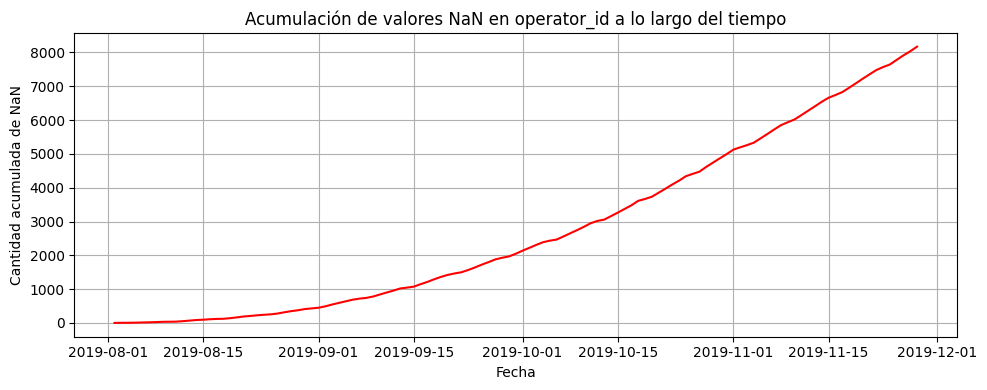

In [14]:
# Filtrar filas con operator_id nulo
nan_by_date = dataset[dataset['operator_id'].isna()]

# Agrupar por fecha y contar cuántos hay por día
nan_counts = nan_by_date.groupby('date').size()

# Calcular suma acumulativa
nan_cumsum = nan_counts.cumsum()

plt.figure(figsize=(10, 4))
plt.plot(nan_cumsum.index, nan_cumsum.values, color='red')
plt.title('Acumulación de valores NaN en operator_id a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad acumulada de NaN')
plt.grid(True)
plt.tight_layout()
plt.show()

Observaciones: Podemos apreciar que los valores ausentes no coresponden a una fecha especifica o a una falla especifica del sistema si no que van aumentando a medida que va pasando el tiempo y acumulando datos, sin presentar un pick relevante que muestre alguna interferencia preocupante. 

#### Proporcion valores ausentes

In [15]:
# Proporción de llamadas perdidas dentro de las que tienen operator_id NaN
missed_nan = nan_by_date['is_missed_call'].mean()
print(f"Proporción de llamadas perdidas con operator_id NaN: {missed_nan:.2%}")

Proporción de llamadas perdidas con operator_id NaN: 98.51%


In [16]:
# Proporción de llamadas internas dentro de las que tienen operator_id NaN
internal_nan = nan_by_date['internal'].value_counts(normalize=True, dropna=False) # normalize indica la proporcion
print("\nDistribución de llamadas internas con operator_id NaN:")
print(internal_nan)


Distribución de llamadas internas con operator_id NaN:
False    0.949584
True     0.043441
NaN      0.006975
Name: internal, dtype: float64


In [17]:
# También lo comparamos con el total para ver si hay diferencia
print("\nDistribución general de llamadas perdidas e internas:")

missed_total_nan = dataset['is_missed_call'].mean()
print(f"Proporción general de llamadas perdidas: {missed_total_nan:.2%}")

internal_total_nan = dataset['internal'].value_counts(normalize=True, dropna=False)
print("\nDistribución general de llamadas internas:")
print(internal_total_nan)


Distribución general de llamadas perdidas e internas:
Proporción general de llamadas perdidas: 43.72%

Distribución general de llamadas internas:
False    0.883474
True     0.114356
NaN      0.002171
Name: internal, dtype: float64


Observaciones: podemos ver que en las llamadas donde el operator_id es nan, el 98.5% son llamadas perdidas. Además, el 95% de estas no fueron internas. Esto quizas sugiere que los datos ausentes en operator_id están asociados a llamadas donde el cliente nunca respondió, y por lo tanto no se asignó ningún operador.

In [18]:
# reemplazo de valores nan 

dataset['operator_id'] = dataset['operator_id'].fillna('unknown')
dataset['internal'] = dataset['internal'].fillna('unknown')

Observaciones: Debido a la gran cantidad de valores nan, se decide reemplazarlos por el valor desconocido ('unknown') para no afectar la veracidad de los datos

### Analisis de valores atipicos 

In [19]:
dataset.describe(percentiles=[.25, .50, .75, .90, .95, .98, .99])

,calls_count,call_duration,total_call_duration,call_duration_min,total_call_duration_min
count,53902.000000,53902.000000,53902.000000,53902.000000,53902.000000
mean,16.451245,866.684427,1157.133297,14.444740,19.285555
std,62.917170,3731.791202,4403.468763,62.196520,73.391146
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,47.000000,0.000000,0.783333
50%,4.000000,38.000000,210.000000,0.633333,3.500000
75%,12.000000,572.000000,902.000000,9.533333,15.033333
90%,35.000000,2105.000000,2626.000000,35.083333,43.766667
95%,62.000000,3739.950000,4540.000000,62.332500,75.666667
98%,104.000000,6966.940000,8674.600000,116.115667,144.576667


In [20]:
# Encontrar los limites de los outliers 

def detectar_outliers_iqr(df, columna):
    """
    Detecta y muestra la cantidad de outliers en una columna usando el método IQR.
    """
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = max(Q1 - 1.5 * IQR, 0)
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)]
    print(f"\nColumna: {columna}")
    print(f"Q1: {Q1}, Q3: {Q3}")
    print(f"IQR: {IQR}")
    print(f"Límite inferior: {lower_bound}")
    print(f"Límite superior: {upper_bound}")
    print(f"Cantidad de outliers: {len(outliers)}")
    
    return outliers

In [21]:
outliers_call_duration = detectar_outliers_iqr(dataset, 'call_duration_min')
outliers_calls_count = detectar_outliers_iqr(dataset, 'calls_count')
outliers_total_call_duration = detectar_outliers_iqr(dataset, 'total_call_duration_min')


Columna: call_duration_min
Q1: 0.0, Q3: 9.533333333333333
IQR: 9.533333333333333
Límite inferior: 0
Límite superior: 23.833333333333336
Cantidad de outliers: 7571

Columna: calls_count
Q1: 1.0, Q3: 12.0
IQR: 11.0
Límite inferior: 0
Límite superior: 28.5
Cantidad de outliers: 6653

Columna: total_call_duration_min
Q1: 0.7833333333333333, Q3: 15.033333333333333
IQR: 14.25
Límite inferior: 0
Límite superior: 36.40833333333333
Cantidad de outliers: 6575


Observaciones: Se aprecia una gran cantidad de outliers en todas las columnas analizadas, por lo que no es posible ignorarlos y debemos hacerlos parte de nuestro analisis

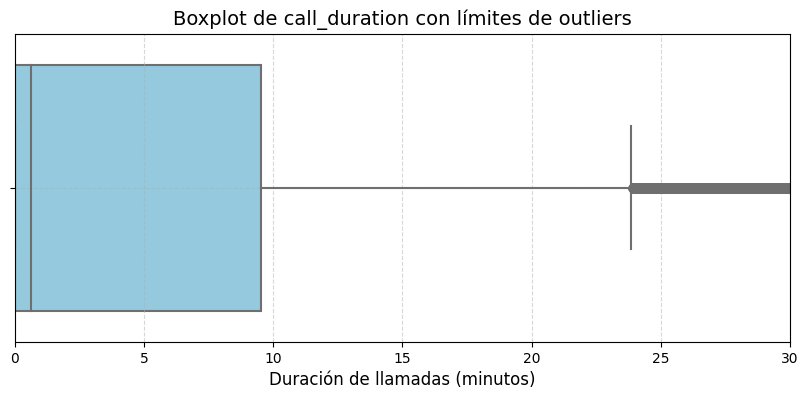

In [22]:
# Gráfico
plt.figure(figsize=(10, 4))
sns.boxplot(x=dataset['call_duration_min'], color='skyblue')
plt.title('Boxplot de call_duration con límites de outliers', fontsize=14)
plt.xlabel('Duración de llamadas (minutos)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0, 30)
plt.show()

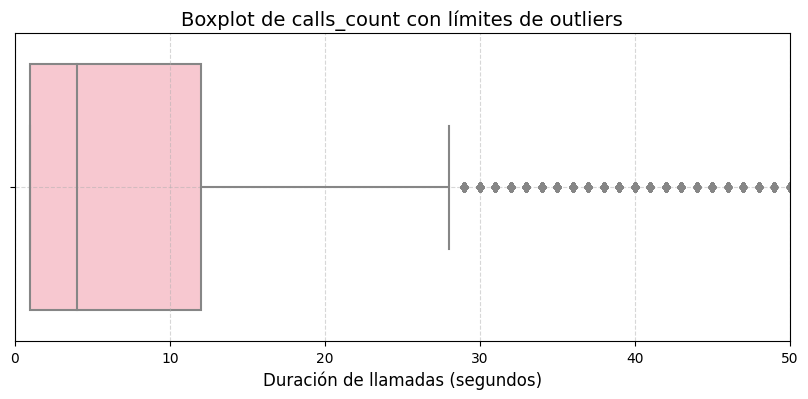

In [23]:
# Gráfico
plt.figure(figsize=(10, 4))
sns.boxplot(x=dataset['calls_count'], color='pink')
plt.title('Boxplot de calls_count con límites de outliers', fontsize=14)
plt.xlabel('Duración de llamadas (segundos)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0, 50)
plt.show()

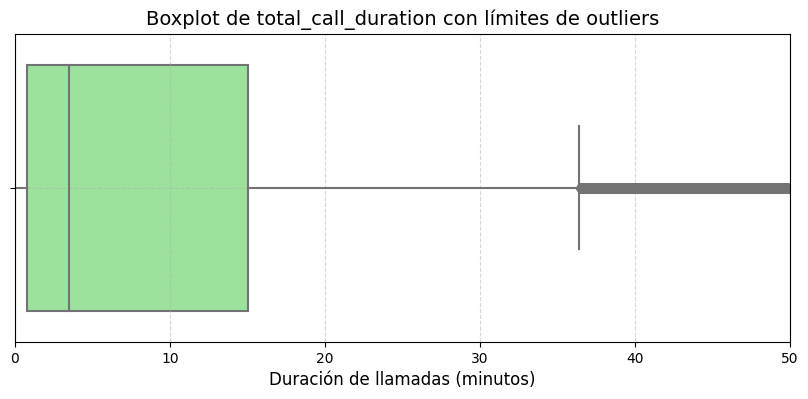

In [24]:
# Gráfico
plt.figure(figsize=(10, 4))
sns.boxplot(x=dataset['total_call_duration_min'], color='lightgreen')
plt.title('Boxplot de total_call_duration con límites de outliers', fontsize=14)
plt.xlabel('Duración de llamadas (minutos)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0, 50)
plt.show()

Observaciones: Como podemos ver en los tres boxplot, todos poseen gran cantidad de outliers para el boxplot de call_duration_min 
Estos valores podrían corresponder a llamadas excepcionales o a prácticas ineficientes por parte de algunos operadores, para el boxplot de calls_count se evidencia que algunos operadores gestionan un volumen de llamadas considerablemente mayor al promedio, lo cual podría estar asociado tanto a alta eficiencia como a posibles problemas de calidad (llamadas cortas y poco efectivas).
finalmente para el boxplot de total_call_duration_min se apreciao sesiones extensas. Esto podría reflejar operadores que tardan demasiado en resolver casos, lo cual amerita un análisis adicional para evaluar su desempeño.

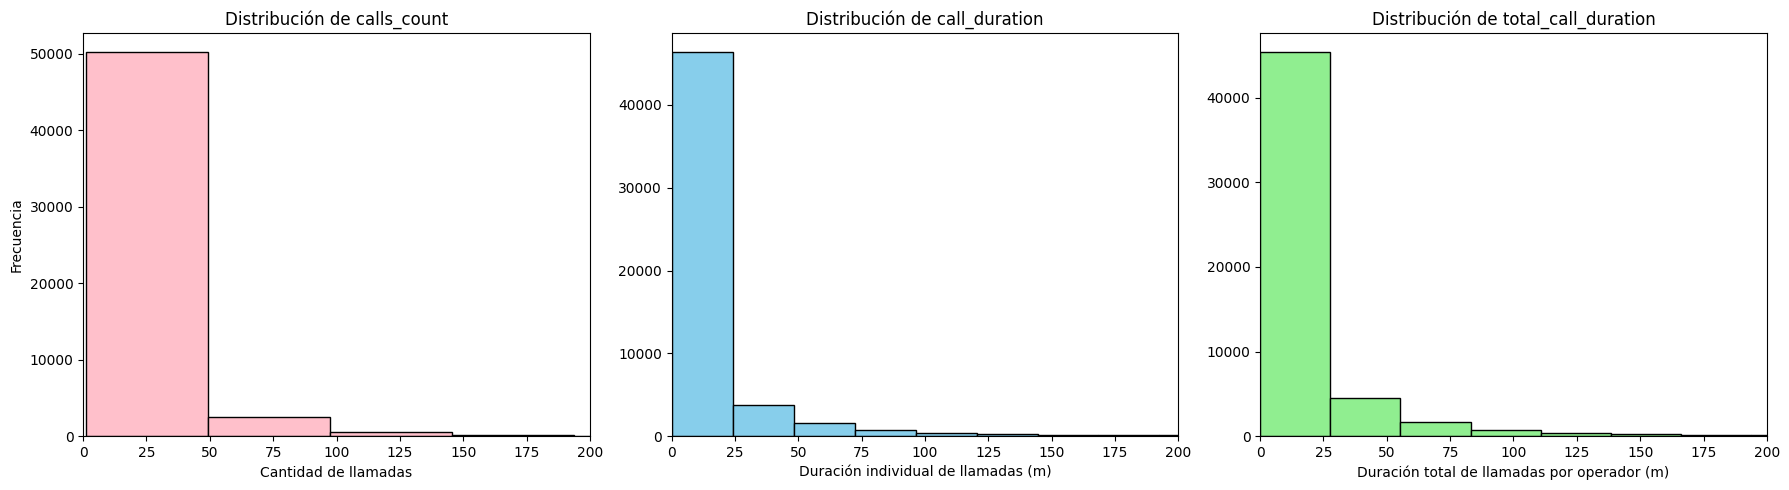

In [25]:
# histogramas de cada columna para ver el comportamiento de los datos en general

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].hist(dataset['calls_count'], bins=100, color='pink', edgecolor='black')
axs[0].set_title('Distribución de calls_count')
axs[0].set_xlim(0, 200)  
axs[0].set_xlabel('Cantidad de llamadas')
axs[0].set_ylabel('Frecuencia')

# Histogram for call_duration
axs[1].hist(dataset['call_duration_min'], bins=100, color='skyblue', edgecolor='black')
axs[1].set_title('Distribución de call_duration')
axs[1].set_xlim(0, 200)
axs[1].set_xlabel('Duración individual de llamadas (m)')

# Histogram for total_call_duration
axs[2].hist(dataset['total_call_duration_min'], bins=100, color='lightgreen', edgecolor='black')
axs[2].set_title('Distribución de total_call_duration')
axs[2].set_xlim(0, 200)
axs[2].set_xlabel('Duración total de llamadas por operador (m)')

plt.tight_layout()
plt.show()

Observaciones: Es importante destacar que la mayoria de los operadores se encuentran dentro de la media y que unos pocos se escapan realmente hacia los outliers lo que nos indica y refuerza que pueden ser comportamientos de extrema eficiencia, llamadas muy cortas o fallas del sistema. 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien planteadas las gráficas y análisis por percentiles, las conclusiones complementan muy bien cada gráfica mostrada. Sólo una cosa, esto ya es parte de tu análisis exploratorio pero veo que el título de esa sección recién lo pones aquí debajo.
</div>

### Analisis operadores

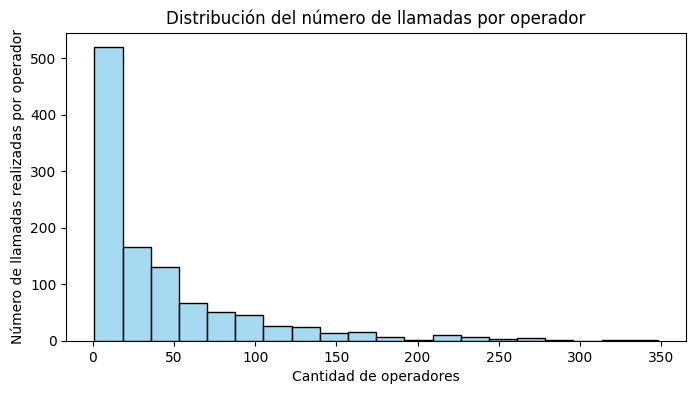

In [61]:
# Excluir llamadas sin operador identificado
operadores_validos = dataset[dataset['operator_id'] != 'unknown']

# Conteo de llamadas por operador
conteo_operadores = operadores_validos['operator_id'].value_counts().sort_values(ascending=False)


# Barplot
plt.figure(figsize=(8, 4))
sns.histplot(conteo_operadores, bins=20, color='skyblue')
plt.title('Distribución del número de llamadas por operador')
plt.ylabel('Número de llamadas realizadas por operador')
plt.xlabel('Cantidad de operadores')
plt.show()

Observaciones: El grafico nos muestra el comportamiento de los operadores con identificador donde podemos ver que existen operadores con 300 llamadas hasta operadores con 1 llamada, lo que ya nos encamina en proceso de identificar los operadores menos eficientes. 

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Cuando tengas datos tan granulares cómo es por ID de usuario, no es correcto plantear gráficas por cada ID ya que si observas tu imagen se puede ver la distribución del número de llamadas pero por ID de usuario y los ID no se logran visualizar, es decir, no puedes observar un usuario específico ni tampoco puedes dar una conclusión clara sobre la métrica en análisis.
    
Cuando se tiene este tipo de datos tan granulares lo mejor es presentarlo de manera más general cómo con histogramasa, gráficos de pastel, etc. Por ejemplo, aquí estás viendo el número de llamadas, entonces en lugar de hacerlo por ID sería mejor que muestres un histograma para ver la distribución en cantidades de llamadas de manera general
</div>

In [27]:
# Agrupar por operador
operador_stats = operadores_validos.groupby(['operator_id', 'user_id']).agg({
    'calls_count': 'sum',
    'call_duration_min': 'sum',
    'is_missed_call': 'mean'
}).rename(columns={
    'calls_count': 'total_llamadas',
    'call_duration_min': 'duracion_total_min',
    'is_missed_call': 'proporcion_perdidas'
})


# cuanto se demora cada operador en cada llamada aproximadamente 
operador_stats['duracion_promedio_min'] = operador_stats['duracion_total_min'] / operador_stats['total_llamadas']

# Ordenar por proporción de llamadas perdidas
operador_stats = operador_stats.sort_values(by='proporcion_perdidas', ascending=False)
operador_stats = operador_stats.sort_values(by='total_llamadas', ascending=False)
operador_stats

,,total_llamadas,duracion_total_min,proporcion_perdidas,duracion_promedio_min
operator_id,user_id,,,,
885876.0,166582,66049,77732.566667,0.423197,1.176892
885890.0,166582,66016,61118.883333,0.397112,0.925819
929428.0,167827,24572,4893.333333,0.500000,0.199143
925922.0,166582,22210,15483.900000,0.417722,0.697159
908640.0,167285,16699,5342.600000,0.461538,0.319935
...,...,...,...,...,...
956664.0,167521,1,1.650000,0.000000,1.650000
947596.0,168062,1,0.933333,0.000000,0.933333
968232.0,167949,1,1.900000,0.000000,1.900000


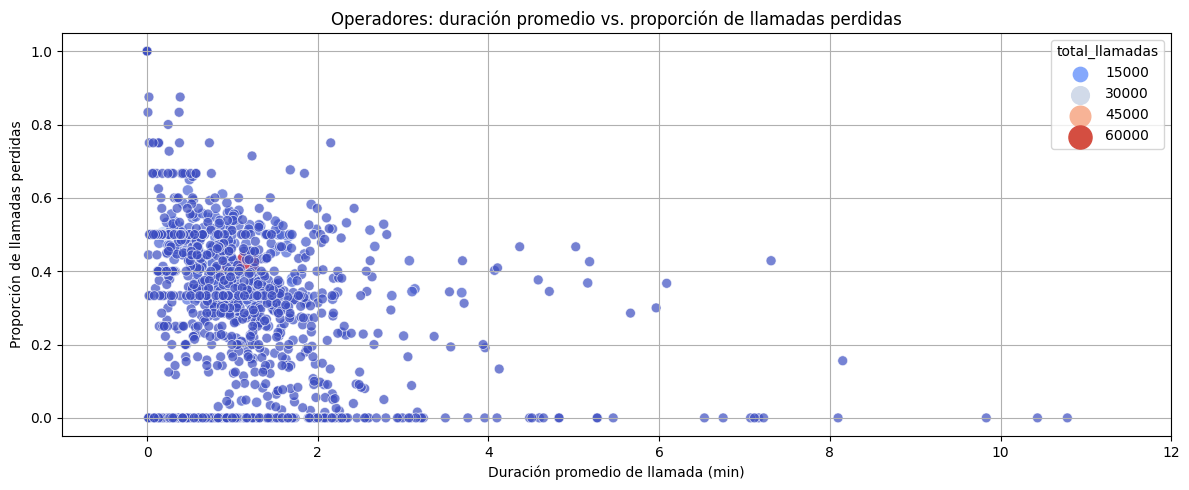

In [28]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=operador_stats, x='duracion_promedio_min', y='proporcion_perdidas', size='total_llamadas', hue='total_llamadas', palette='coolwarm', sizes=(50, 300), alpha=0.7)
plt.title('Operadores: duración promedio vs. proporción de llamadas perdidas')
plt.xlabel('Duración promedio de llamada (min)')
plt.ylabel('Proporción de llamadas perdidas')
plt.grid(True)
plt.xlim(-1,12)
plt.tight_layout()
plt.show()

Observaciones: A traves del analisis de los operadores podemos apreciar que el operador ideal no es el que mas llamadas tiene si no mas bien el que logra un equilibrio entre cantidad de llamadas y llamadas perdidas, en el grafico se aprecia que los operadores de la esquina superior izquierda del posee una alta proporción de llamadas perdidas y baja duración promedio los cuales postulan a ser fuertes candidatos ineficientes.
Los que tienen baja proporción de pérdidas y buena duración promedio podrían considerarse eficientes.

### Clustering

Para comenzar con la implementacion de cluster, primero debemos definir que variables tendremos en consideracion para su evaluacion, ya que son estas variables las que nos llevaran al resultado de descbrir a los operadores ineficientes

en base a esto seleccionaremos las siguientes tres variables:
proporcion_perdidas: proporción de llamadas no contestadas (ineficiencia).
duracion_promedio_min: duración promedio de llamadas (calidad/tiempo).
total_llamadas: volumen total de llamadas realizadas por operador (actividad).

Estas variables representan todas juntas la eficiencia de los operadores, tanto en términos de rendimiento como de carga de trabajo.

Sabemos que los dataset contienen ademas otras columnas (como: direction, internal, date, user_id), estas no fueron incluidas ya que en su mayoria son variables categóricas que no aportan información directa sobre eficiencia operativa individual sin un análisis más profundo o no son informativas para análisis de clusters de operadores.

En conclusion, se priorizaron variables que permiten medir el comportamiento operativo de los operadores de forma cuantitativa y facilitando así una division clara basada en eficiencia.

In [29]:
# definir variables
X = operador_stats[['proporcion_perdidas', 'duracion_promedio_min', 'total_llamadas']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Aquí habría que redactar el por qué se escogen sólo estas tres variables para poder aplicar el algoritmo de clustering, ¿Es algo que se observó en las gráficas o en los cálculos realizados?
    
Siempre hay que justificar este tipo de decisiones.
</div>

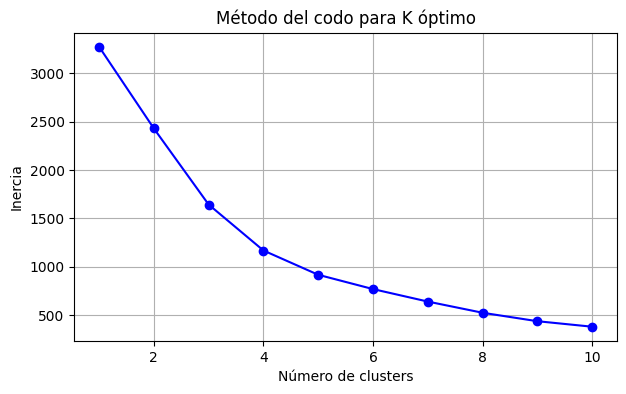

In [30]:
# aplicando metodo codo para calcular cuantos clusters usaremos

inertia = []
K = range(1, 11) # probar 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo para K óptimo')
plt.grid(True)
plt.show()

Observaciones: Se aprecia que el punto donde la curva deja de disminuir bruscamente ocurre en al 4to cluster lo que nos indica que lo mas recomendable es trabajar con 4 clusters. 

In [31]:
# Aplicar K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Agregar resultado al DataFrame filtrado
operador_stats['cluster'] = clusters
operador_stats

,,total_llamadas,duracion_total_min,proporcion_perdidas,duracion_promedio_min,cluster
operator_id,user_id,,,,,
885876.0,166582,66049,77732.566667,0.423197,1.176892,2
885890.0,166582,66016,61118.883333,0.397112,0.925819,2
929428.0,167827,24572,4893.333333,0.500000,0.199143,3
925922.0,166582,22210,15483.900000,0.417722,0.697159,3
908640.0,167285,16699,5342.600000,0.461538,0.319935,3
...,...,...,...,...,...,...
956664.0,167521,1,1.650000,0.000000,1.650000,1
947596.0,168062,1,0.933333,0.000000,0.933333,1
968232.0,167949,1,1.900000,0.000000,1.900000,1


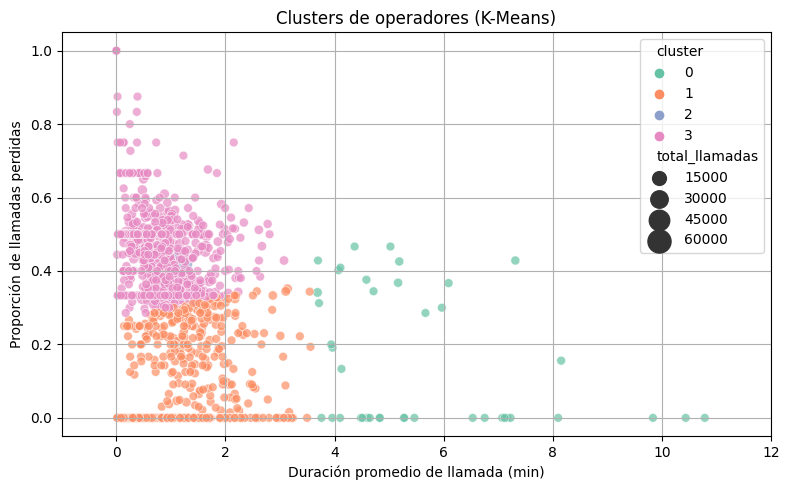

In [32]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=operador_stats, 
    x='duracion_promedio_min', 
    y='proporcion_perdidas', 
    hue='cluster', 
    palette='Set2', 
    size='total_llamadas', 
    sizes=(40, 300), 
    alpha=0.7
)
plt.title('Clusters de operadores (K-Means)')
plt.xlabel('Duración promedio de llamada (min)')
plt.ylabel('Proporción de llamadas perdidas')
plt.grid(True)
plt.xlim(-1, 12)
plt.tight_layout()
plt.show()

Observaciones:

El cluster 0 (verde) agrupa a operadores con llamadas largas y proporción de pérdida cercana a cero. Posiblemente los operadores más eficientes.
El cluster 1 (naranja) tiene llamadas cortas y baja pérdida. Eficientes, pero en interacciones breves.
El cluster 3 (rosado) agrupa a operadores con alta proporción de pérdida, quizás ineficaces.
El cluster 2 (azul, aunque apenas se ve) podría ser un grupo especial con comportamiento intermedio (aunque parece muy reducido).

#### Analisis cluster inferiores

In [33]:
# explorando operadores con malos resultados 

cluster_inferior = operador_stats[operador_stats['cluster'] == 3]
cluster_inferior_2 = operador_stats[operador_stats['cluster'] == 2]
cluster_inferior.sort_values(by='proporcion_perdidas', ascending=False).head()

# nueva columna con la proporción redondeada al 10% más cercano
cluster_inferior['proporcion_redondeada'] = (cluster_inferior['proporcion_perdidas'] * 100).round()
cluster_inferior

/tmp/ipykernel_50/3142856230.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_inferior['proporcion_redondeada'] = (cluster_inferior['proporcion_perdidas'] * 100).round()


,,total_llamadas,duracion_total_min,proporcion_perdidas,duracion_promedio_min,cluster,proporcion_redondeada
operator_id,user_id,,,,,,
929428.0,167827,24572,4893.333333,0.500000,0.199143,3,50.0
925922.0,166582,22210,15483.900000,0.417722,0.697159,3,42.0
908640.0,167285,16699,5342.600000,0.461538,0.319935,3,46.0
929426.0,167827,12041,4663.183333,0.514706,0.387275,3,51.0
879898.0,166406,7974,4647.966667,0.398406,0.582890,3,40.0
...,...,...,...,...,...,...,...
954284.0,168073,1,0.000000,1.000000,0.000000,3,100.0
958458.0,168091,1,0.000000,1.000000,0.000000,3,100.0
970250.0,168225,1,0.000000,1.000000,0.000000,3,100.0


In [34]:
perdidas_3 = cluster_inferior.groupby(['proporcion_redondeada']).size().reset_index(name='cantidad_operadores').sort_values(by='proporcion_redondeada', ascending=False)
perdidas_3.head()

,proporcion_redondeada,cantidad_operadores
44,100.0,34
43,88.0,2
42,83.0,2
41,80.0,1
40,75.0,7


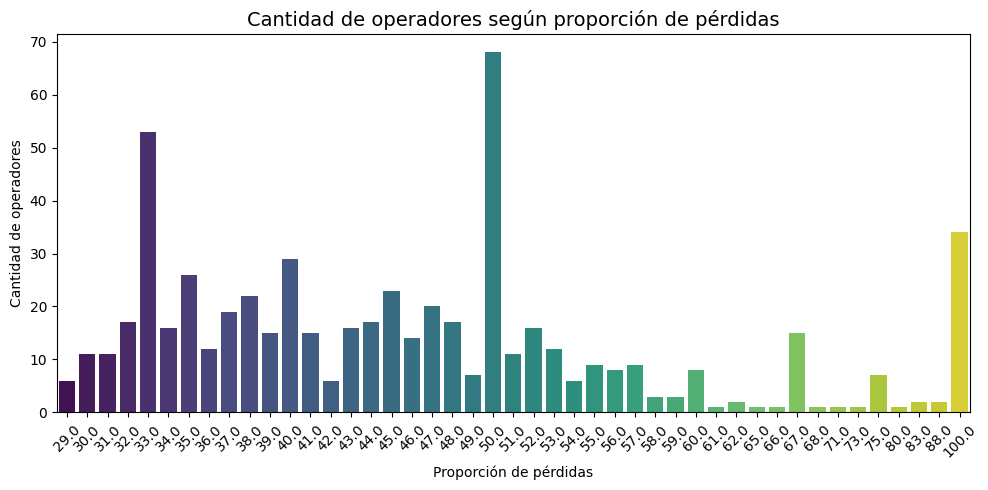

In [35]:
# grafica de operadores vs perdidas

plt.figure(figsize=(10, 5))
sns.barplot(data=perdidas_3, x='proporcion_redondeada', y='cantidad_operadores', palette='viridis')
plt.title('Cantidad de operadores según proporción de pérdidas', fontsize=14)
plt.xlabel('Proporción de pérdidas')
plt.ylabel('Cantidad de operadores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observaciones: Podemos observar que el cluster 3 posee gran cantidad de llamadas perdidas por operador, lo que es bastante preocupante y amerita una revision exhaustiva de la forma de trabajar de los operadores, definiremos mas adelante la cantidad porporcional de llamadas perdidas aceptable. pero diriamos que sobre un 30% es bastante. 

In [36]:
cluster_inferior_2

,,total_llamadas,duracion_total_min,proporcion_perdidas,duracion_promedio_min,cluster
operator_id,user_id,,,,,
885876.0,166582,66049,77732.566667,0.423197,1.176892,2
885890.0,166582,66016,61118.883333,0.397112,0.925819,2


Observaciones: Como podemos ver existe una extrana anomalia para el cluster 2 ya que son solo dos operadores con mas de 60 mil llamadas cada uno, interactuando con el mismo usuario, y las posibles explicaciones son
Podrían ser bots, sistemas automáticos o responsables de campañas masivas, lo cual explicaría ese volumen tan descomunal y también la alta proporción de llamadas perdidas.
Error en los datos, recopilacion o error del sistema.
Lo mas recomendable es averiguar con este cliente y operadores que sucedio y dejar este cluster fuera del resto del analisis.

### Definir el plan y cluster mas efectivo

In [37]:
def object_convert(df, columns):
    "Convierte columnas a tipo de dato object"
    for column in columns:
        df[column] = df[column].astype('object')
    return(df)

operador_stats = operador_stats.reset_index()
operador_stats = object_convert(operador_stats, ['operator_id'])
operador_stats = object_convert(operador_stats, ['user_id'])

In [38]:
operador_merged = operador_stats.merge(clients, on='user_id')

operador_merged = operador_merged[operador_merged['cluster'] != 2]

operador_merged.head()

,operator_id,user_id,total_llamadas,duracion_total_min,proporcion_perdidas,duracion_promedio_min,cluster,tariff_plan,date_start
2,925922.0,166582,22210,15483.900000,0.417722,0.697159,3,A,2019-08-09
3,929428.0,167827,24572,4893.333333,0.500000,0.199143,3,C,2019-10-02
4,929426.0,167827,12041,4663.183333,0.514706,0.387275,3,C,2019-10-02
5,929424.0,167827,5438,2562.033333,0.323741,0.471135,3,C,2019-10-02
6,908640.0,167285,16699,5342.600000,0.461538,0.319935,3,A,2019-09-10


#### Estudio de planes

In [39]:
# Agrupamos por plan tarifario y obtenemos estadísticas relevantes
plan_stats = operador_merged.groupby('tariff_plan').agg({
    'proporcion_perdidas': ['mean', 'std'],
    'duracion_promedio_min': ['mean', 'std'],
    'total_llamadas': 'mean'
}).round(2)

# Mostramos los resultados
plan_stats

proporcion_perdidas       duracion_promedio_min        \
                           mean   std                  mean   std   
tariff_plan                                                         
A                          0.36  0.20                  1.00  0.65   
B                          0.33  0.23                  1.31  1.31   
C                          0.26  0.24                  1.35  1.67   

            total_llamadas  
                      mean  
tariff_plan                 
A                   936.67  
B                   385.76  
C                   517.07

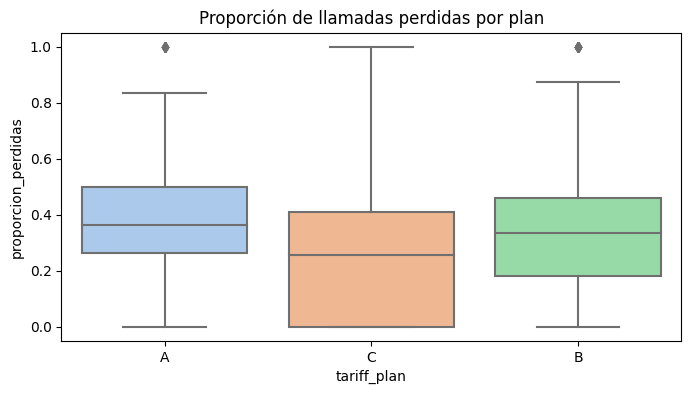

In [40]:
# Boxplot de proporción de llamadas perdidas por plan
plt.figure(figsize=(8, 4))
sns.boxplot(data=operador_merged, x='tariff_plan', y='proporcion_perdidas', palette='pastel')
plt.title('Proporción de llamadas perdidas por plan')
plt.show()

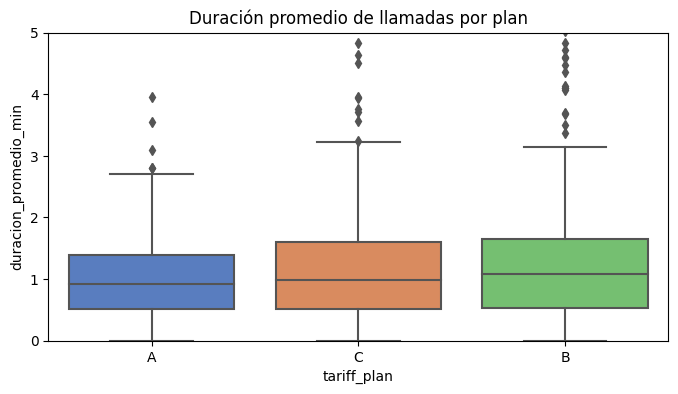

In [41]:
# Boxplot de duración promedio por plan
plt.figure(figsize=(8, 4))
sns.boxplot(data=operador_merged, x='tariff_plan', y='duracion_promedio_min', palette='muted')
plt.title('Duración promedio de llamadas por plan')
plt.ylim(0, 5)
plt.show()

Observaciones: 
Con respecto a el promedio de llamadas perdidas:
Plan A: Promedio de 36%, con desviación estándar de 20%.
Plan B: Promedio de 33%, desviación de 23%.
Plan C: El menor: 26%, desviación de 24%.
Esto no indica que, en promedio, los operadores asociados al Plan C pierden menos llamadas que los de los otros planes. El boxplot nos muestra una menor mediana y mayor dispersión.

Con respecto a el promedio de duracion de llamadas: 
Plan A: 1.00 minuto
Plan B: 1.31 minutos
Plan C: 1.35 minutos
Los operadores del Plan C también tienen las llamadas más largas en promedio. La desviación estándar es más alta, lo que indica más variabilidad, pero en general son llamadas más extensas.

Cantidad de llamadas por operador:
Plan A: 1356 llamadas por operador
Plan B: 385 llamadas
Plan C: 517 llamadas
El Plan A claramente gestiona más llamadas, lo cual podría explicar en parte su mayor proporción de llamadas perdidas.

#### Estudio de clusters

In [42]:
cluster_stats = operador_merged.groupby('cluster').agg({
    'proporcion_perdidas': ['mean', 'std'],
    'duracion_promedio_min': ['mean', 'std'],
    'total_llamadas': 'mean'
}).round(2)

cluster_stats

proporcion_perdidas       duracion_promedio_min       total_llamadas
                       mean   std                  mean   std           mean
cluster                                                                     
0                      0.15  0.18                  6.00  3.09         154.45
1                      0.12  0.12                  1.31  0.77         133.48
3                      0.48  0.16                  0.85  0.58         966.14

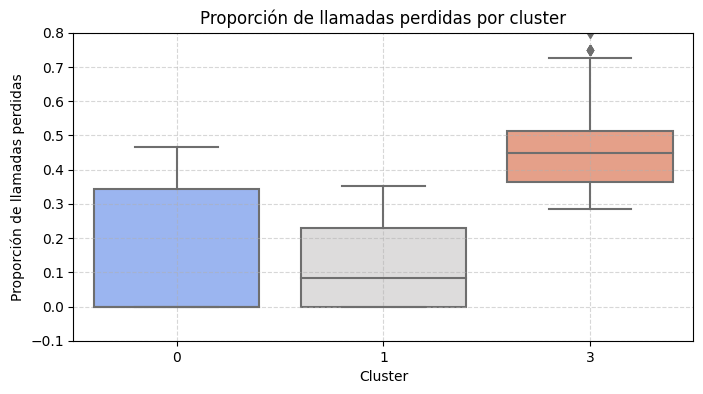

In [43]:
# grafica por cluster proporcion llamadas perdidas

plt.figure(figsize=(8, 4))
sns.boxplot(data=operador_merged, x='cluster', y='proporcion_perdidas', palette='coolwarm')
plt.title('Proporción de llamadas perdidas por cluster')
plt.xlabel('Cluster')
plt.ylabel('Proporción de llamadas perdidas')
plt.ylim(-0.1, 0.8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

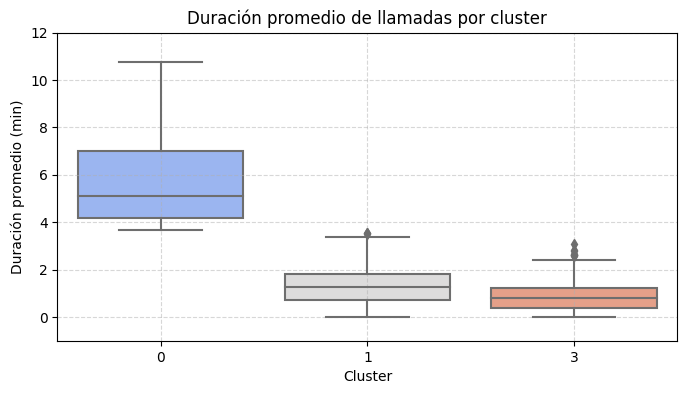

In [44]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=operador_merged, x='cluster', y='duracion_promedio_min', palette='coolwarm')
plt.title('Duración promedio de llamadas por cluster')
plt.xlabel('Cluster')
plt.ylabel('Duración promedio (min)')
plt.ylim(-1, 12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Observaciones: 

Cluster 0: Llamadas muy largas, pocas, pero eficientes, parece eficiente pero costoso debido a lo largo de las llamadas.
Cluster 1: Pocas perdidas y duración adecuada, parece ser el mas eficiente
Cluster 3: Llamadas cortas y muchas perdidas, muy ineficiente

In [45]:
tabla_cruzada = pd.crosstab(operador_merged['cluster'], operador_merged['tariff_plan'], margins=True, margins_name="Total")

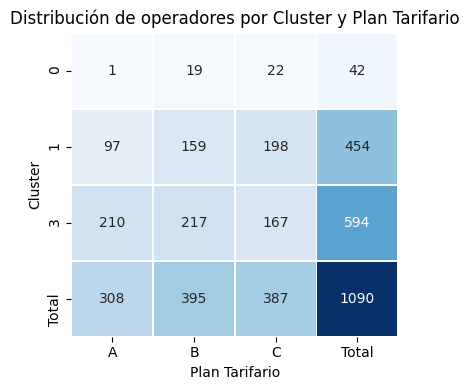

In [46]:
plt.figure(figsize=(4, 4))
sns.heatmap(tabla_cruzada, annot=True, cmap='Blues', fmt='d', cbar=False, linewidths=0.5)
plt.title('Distribución de operadores por Cluster y Plan Tarifario')
plt.xlabel('Plan Tarifario')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()

Observaciones:
Plan B: Tiene buena presencia en el Cluster 1 (eficiente), pero también en el Cluster 3 (ineficiente). Podemos inferir que no es el plan lo que define la eficiencia, sino quizás otros factores (formación, carga laboral, etc.).
Plan C: Similar al B, repartido entre eficiencia e ineficiencia. Aunque se destaca más en el Cluster 1.
Plan A: Es el más polarizado: 210 operadores en Cluster 3, muy pocos en Cluster 0 y 1. Esto podría ser un foco de análisis: ¿están los operadores del plan A mal capacitados o enfrentan peores condiciones?

Podemos finalmente concluir que los planes no interfieren en la eficiencia de los cluster

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hasta aquí el análisis a partir de la agrupación de los operadores se realizó de manera correcta planteando conclusiones adecuadas a partir de lo observado lo cual deja un notebook con un proceso de análisis más fácil de seguir.
</div>

### Prueba de hipotesis ANOVA (Análisis de Varianza)

Hipótesis nula (H₀): Las medias de las proporciones de llamadas perdidas (o duración promedio) son iguales entre los clusters (no hay diferencia en eficiencia).

Hipótesis alternativa (H₁): Al menos un cluster tiene una media significativamente diferente en comparación con los otros.

In [47]:
# prueba ANOVA de cluster con respecto a proporcion_perdidas
grupo_0 = operador_merged[operador_merged['cluster'] == 0]['proporcion_perdidas']
grupo_1 = operador_merged[operador_merged['cluster'] == 1]['proporcion_perdidas']
grupo_3 = operador_merged[operador_merged['cluster'] == 3]['proporcion_perdidas']

f_stat, p_val = f_oneway(grupo_0, grupo_1, grupo_3)

print(f'Estadístico F: {f_stat:.2f}')
print(f'Valor p: {p_val:.4f}')

Estadístico F: 789.58
Valor p: 0.0000


Observaciones: 
Estadístico F alto (789.58): Este valor indica que las diferencias entre las medias de los grupos (clusters) son mucho mayores que la variabilidad dentro de los grupos. Un valor F tan alto sugiere que las diferencias entre los clusters son sustanciales.

Valor p (0.0000): El valor p es muy bajo (menor que 0.05), lo que significa que rechazamos la hipótesis nula. La hipótesis nula de que no hay diferencias entre las medias de los clusters debe ser rechazada.

Lo que podemos concluir es que la media de las proporciones perdidas por cluster son notoriamente distintas, por lo que independiente de la cantidad de operadores, o llamadas, al menos en proporciones de llamadas perdidas el cluster 3 sigue siendo el menos eficiente. y marca una gran diferencia con respecto a los otros dos cluster.

In [48]:
# Seleccionar la variable de interés (por ejemplo, 'proporcion_perdidas')
grupo_0 = operador_merged[operador_merged['cluster'] == 0]['duracion_promedio_min']
grupo_1 = operador_merged[operador_merged['cluster'] == 1]['duracion_promedio_min']
grupo_3 = operador_merged[operador_merged['cluster'] == 3]['duracion_promedio_min']

# Realizar la prueba ANOVA
f_stat, p_val = f_oneway(grupo_0, grupo_1, grupo_3)

print(f'Estadístico F: {f_stat:.2f}')
print(f'Valor p: {p_val:.4f}')

Estadístico F: 657.93
Valor p: 0.0000


Observaciones: 
Estadístico F alto (657.93): Este valor sigue siendo bastante alto, lo que indica que la variabilidad entre los grupos (clusters) es considerablemente mayor que la variabilidad dentro de los grupos. Esto refuerza la idea de que hay diferencias significativas entre los clusters en cuanto a la duración promedio de llamadas.
Valor p (0.0000): Este valor es muy bajo, lo que nuevamente indica que rechazamos la hipótesis nula de que las medias de duración promedio de llamadas entre los clusters son iguales.

Y volvemos a la conclusion previa de que el comportamiento de los cluster es altamente diferente y que podemos decir que el mas ineficiente es el cluster 3 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, siempre hay que comprobar con pruebas estadísticas que efectivamente exista una diferencia entre los grupos a comparar
</div>

## Conclusiones generales

### Proporción de llamadas perdidas

Un cluster con alta proporción de llamadas perdidas está mostrando una baja eficiencia.
El cluster 3 tiene la proporción de pérdidas más alta (0.48), lo que nos indica un desempeño deficiente en términos de pérdidas de llamadas. Esto es una clara señal de que los operadores en este cluster no están realizando un buen trabajo al gestionar las llamadas correctamente.

### Duración promedio de llamadas

Un cluster con duraciones muy altas de llamadas podría estar indicando un desempeño ineficiente si no justifica un servicio de calidad superior. En este caso, el cluster 0 tiene una duración promedio de llamadas alta (6.00 minutos), lo que podría significar que, aunque las pérdidas no son tan altas, las llamadas son largas y, por lo tanto, costosas o ineficientes en términos de tiempo.

### Comparativa integral:

Cluster 3 tiene la peor proporción de pérdidas (0.48) y una duración promedio baja (0.85), lo que significa que no solo pierde muchas llamadas, sino que también tiene una duración de llamadas muy corta. Además, su número de llamadas es considerable, lo que refleja una ineficiencia general.


Conclusión:
El cluster 3 es el peor debido a su alta tasa de pérdida de llamadas y su baja eficiencia en la duración promedio de llamadas. Si el objetivo es mejorar la eficiencia.



## Acceso al Dashboard Interactivo

Para complementar el análisis presentado, se encuentra disponible un dashboard dinámico desarrollado en Tableau Public. Puede accederse a través del siguiente enlace:

https://public.tableau.com/app/profile/rocio.bozo/viz/Book1_17458116236900/Dashboard1?publish=yes

El presente análisis y el dashboard desarrollado buscan ofrecer herramientas prácticas para mejorar la eficiencia operativa de CallMeMaybe, enfocando esfuerzos en los segmentos de usuarios identificados como críticos.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen avance con el proyecto Rocio! Hay ciertos puntos que tienen oportunidad de mejora donde te he dejado algunos comentarios para esto y también hace falta tu presentación en PDF la cual debes realizar para exponer los hallazgo encontrados en tu análisis y subirlo a google drive para adjuntar el link en este notebook así cómo hiciste con el dashboard y poder completar el proyecto. 
    
Recuerda probar el link que vas a compartir, abrelo en tu navegador en modo incógnito para asegurarte que esté configurado para que cualquiera pueda acceder con el link sin necesidad de solicitar permisos. Saludos!
</div>